# Assignment 2
## Naive Bayes Classifier

## Student Details (1 Point)

First Student Name and ID: 
 Name :Krishna kumar Balasubramanian
 ID   : 1001949939
 Name : Mohanraj Senabady
 ID   : 1001964323
 Name : Pooja Srinivasan 
 ID   : 1001952061

Notes: When submitting, fill your name and ID in this cell.  [1 point]

Make sure to write about any 4-5 line to explain any kind of visualization

Do not to forget to cite any external sources used by you.

# Remeber to cite any external sources here

# Naive Bayes-

## Programming Assignment Details-

## Preprocessing-
You have textual data that you cannot feed into the model. Therefore, you need to extract features from the text (email) and transform the data. There are techniques to do so, such as Bag of Words, n-grams, Tf-Idf, Word2Vec, CountVectorizer, and many others.

## The Model-
Test train split, using 80% for training, rest for testing. Next you will need to train NB model(Gausian) for classification.

Create the model using training data, predict on the test data, and get the accuracy, plot the confusion matrix.

## Metrics to report- 
You will need to report-
1. Accuracy Score(metrics.accuracy_score)
2. Confusion Matrix(metrics.confusion_matrix) plotted graphically(It needs to be in the final jupyter file which you submit)

## Answer the following questions-
Do not include too much information, it has to be consise. Just your student ids, and the necessary info.
1. Briefly explain your approach, any preprocessing, explain the output, any visualisation for explanation, in same jupyter file. (3-4 paragraphs max)

## Grading-
1. (30 pts) Loading and preprocessing of the data.
2. (30 pts) Creation of correct model(NB), with decent metrics, plotting confusion matrix.
3. (30 pts) Explaining the approach, also explain the(if any) preprocessor which you used.
4. (7 pts) Neatly presented code, with comments, correctly named files, complete report section, and followed the UTA code of conduct.

## Programming Assignment Submission Instructions (2 Points)
Each file should be submitted separately, do not compress them, only one student submits.

Format of file naming:

NB-
'yourLastName_Last4digitsofyourID_NB.ipynb' (Report in markdown cells and code in code cells of Notebook preferred)

## What to submit-
1. Jupyter files(.ipynb)

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
import pandas as pd

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer

import seaborn as sea
%matplotlib inline

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/krishnakumar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

1) Load the dataset using read_csv.

In [32]:
#read comma-separated values (CSV) data from a file or URL and create a DataFrame object
df = pd.read_csv("dataset_NB.csv")
df.head()

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [33]:
#each group is defined by a unique value in a specified column
df.groupby('label').describe()

email                                                               
      count unique                                                top freq
label                                                                     
0      2500   2445                     url URL date not supplied URL    10
1       499    427  lowest rates available for term life insurance...    5

<AxesSubplot:xlabel='label', ylabel='count'>

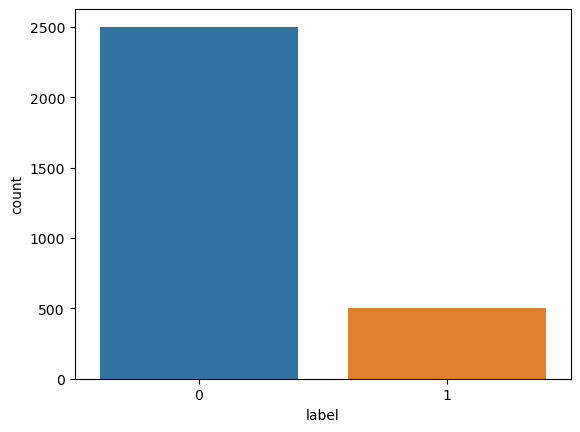

In [34]:
#plot the count of occurrences of categorical data in a dataset
sea.countplot(data=df, x='label')

2) Data PreProcessing
Feature extraction and data preprocessing using the scikit-learn TfidfVectorizer object:

For preprocessing and feature extraction in text datasets, particularly email datasets, TF-IDF is a commonly used technique for numerous reasons:

Certain words may be commonly used in email databases even though they may not be very informative about the email's content. In contrast, some terms might be used less frequently but are essential to comprehending the email's message. The TF-IDF method gives words that are crucial for comprehending the email's content greater weight by taking into account both the frequency of terms in the document (TF) and the frequency of words across all texts (IDF).

Email datasets may have a large number of noisy features, such as URLs, misspelled words, or email addresses, which can affect the analysis's quality. By giving these noisy features modest weights, TF-IDF can assist in lessening their influence.

In [35]:
# Data Preprocessing
import string
from nltk.corpus import stopwords
from nltk import PorterStemmer as Stemmer
def process(p):
    # lowercase
    p = p.lower()
    # removes punctuation
    p = ''.join([t for t in p if t not in string.punctuation])
    # removes stopwords
    p = [t for t in p.split() if t not in stopwords.words('english')]
    # stemming
    st = Stemmer()
    p = [st.stem(t) for t in p]
    # return token list
    return p

In [36]:
#Dropping rows in which there are no emails available(nan)
df.dropna(inplace=True)
df.count()

email    2999
label    2999
dtype: int64

In [37]:
#Checking with our datasets
df['email'][:10].apply(process)

0    [date, wed, number, aug, number, number, numbe...
1    [martin, post, tasso, papadopoulo, greek, scul...
2    [man, threaten, explos, moscow, thursday, augu...
3    [klez, viru, die, alreadi, prolif, viru, ever,...
4    [ad, cream, spaghetti, carbonara, effect, past...
5    [jump, carbonara, one, favourit, make, ask, he...
6    [scotsman, number, august, number, playboy, wa...
7    [martin, adamson, wrote, basic, mixtur, beaten...
8    [scotsman, thu, number, aug, number, meaning, ...
9    [tri, research, via, sa, mirror, search, engin...
Name: email, dtype: object

In [38]:
#tfidfv technique is used in extraction process
tfidfv = TfidfVectorizer(analyzer=process)
data = tfidfv.fit_transform(df['email'].values.astype('U'))

In [39]:
#df.iloc[2] selects the row with index 2 (using integer-based indexing)
ind = df.iloc[2]['email']
print(ind)

man threatens explosion in moscow thursday august NUMBER NUMBER NUMBER NUMBER pm moscow ap security officers on thursday seized an unidentified man who said he was armed with explosives and threatened to blow up his truck in front of russia s federal security services headquarters in moscow ntv television reported the officers seized an automatic rifle the man was carrying then the man got out of the truck and was taken into custody ntv said no other details were immediately available the man had demanded talks with high government officials the interfax and itar tass news agencies said ekho moskvy radio reported that he wanted to talk with russian president vladimir putin police and security forces rushed to the security service building within blocks of the kremlin red square and the bolshoi ballet and surrounded the man who claimed to have one and a half tons of explosives the news agencies said negotiations continued for about one and a half hours outside the building itar tass and

In [40]:
print(tfidfv.transform([ind]))

  (0, 24374)	0.08238875335638861
  (0, 23903)	0.042648518672198814
  (0, 23897)	0.06426148254161416
  (0, 23450)	0.02920440411739991
  (0, 23239)	0.08454415430974409
  (0, 22805)	0.02064921628253946
  (0, 22788)	0.03779361041073908
  (0, 22633)	0.07503577949419662
  (0, 22485)	0.08454415430974409
  (0, 22001)	0.1255344924241918
  (0, 21733)	0.0627672462120959
  (0, 21519)	0.10612856982435563
  (0, 21486)	0.12462445753265959
  (0, 21270)	0.061456468466449574
  (0, 21145)	0.17775820379396962
  (0, 21103)	0.07090485017171602
  (0, 21087)	0.04971087903140408
  (0, 20874)	0.06324249317429229
  (0, 20679)	0.03217989805461683
  (0, 20594)	0.04749094507072027
  (0, 20308)	0.06373985244270332
  (0, 20263)	0.03359992578307323
  (0, 19344)	0.14342922961844776
  (0, 19286)	0.03266966137511074
  (0, 19251)	0.13077584605378767
  :	:
  (0, 5994)	0.08887910189698481
  (0, 5738)	0.0468427892792226
  (0, 5642)	0.1394457412282691
  (0, 4988)	0.04584287448652976
  (0, 4864)	0.053064284912177816
  (0, 4461

In [41]:
k = tfidfv.transform([ind]).toarray()[0]
print('index\tidf\ttfidf\tterm')
for i in range(len(k)):
    if k[i] != 0:
        print(i, format(tfidfv.idf_[i], '.4f'), format(k[i], '.4f'), tfidfv.get_feature_names()[i],sep='\t')

index	idf	tfidf	term
425	5.2928	0.1132	agenc
1003	6.6085	0.0707	ap
1039	4.1622	0.0445	appear
1155	5.2928	0.0566	arm
1340	4.7297	0.0506	attempt
1377	4.2023	0.0449	august
1396	4.4214	0.0473	author
1415	4.7159	0.0504	automat
1433	3.7283	0.0399	avail
1473	4.0864	0.0437	away
1606	7.9078	0.0845	ballet
2164	4.9810	0.0533	block
2192	5.8283	0.0623	blow
2317	8.3132	0.0889	bolshoi
2662	3.5814	0.1149	build
3020	4.9990	0.0534	carri
3456	5.8709	0.0628	cite
3492	4.2357	0.0453	claim
4042	4.3620	0.0466	continu
4461	7.0605	0.0755	custodi
4864	4.9633	0.0531	demand
4988	4.2879	0.0458	detail
5642	6.5215	0.1394	drove
5738	4.3814	0.0468	dvd
5994	8.3132	0.0889	ekho
6072	2.3930	0.0256	email
6416	6.9269	0.0741	escort
6671	6.2338	0.1999	explos
6917	4.8017	0.0513	feder
7335	4.2614	0.0456	forc
7394	4.1543	0.0444	forteana
7488	2.7001	0.0289	free
7561	5.0551	0.0540	front
7914	2.0897	0.0223	get


/Users/krishnakumar/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


8191	3.3680	0.0360	got
8206	4.0719	0.0435	govern
8375	2.9333	0.0941	group
8585	4.2614	0.0911	half
8789	6.4414	0.0689	headquart
8844	5.0943	0.0545	held
8962	3.7753	0.0404	high
9225	5.8283	0.0623	hotel
9235	3.8824	0.0415	hour
9603	4.1861	0.0448	immedi
9979	8.3132	0.1778	interfax
10242	8.3132	0.1778	itar
10590	4.0937	0.0438	join
11162	8.3132	0.0889	kremlin
11367	4.3242	0.0462	later
11879	4.9288	0.0527	locat
12290	4.2702	0.3196	man
13177	7.2146	0.3857	moscow
13179	8.3132	0.0889	moskvi
13212	3.9629	0.0424	move
13577	4.8475	0.0518	near
13610	6.2983	0.1347	negoti
13711	3.8302	0.0819	news
14074	8.3132	0.1778	ntv
14089	1.1916	0.0637	number
15300	4.2528	0.0909	offic
15301	4.5066	0.0482	offici
15377	7.3969	0.0791	olymp
15404	2.2379	0.0479	one
15677	4.8632	0.0520	outsid
15806	3.9312	0.0420	p
16164	8.3132	0.0889	penta
16580	3.7969	0.0406	pm
16678	5.1352	0.1647	polic
16970	4.6369	0.0496	presid
16975	4.8320	0.0517	press
17339	8.3132	0.0889	putin
17654	5.1562	0.0551	radio
17926	4.1701	0.0446	red
18157

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB

3) Spliting the dataset into 80% training and 20% testing dataset.

In [43]:
# Splitting the Dataframe into test (20 %) and train (80 %) data.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df['email'], df['label'], test_size=0.20, random_state = 21)

In [44]:
# Vectorizer
tfidf=TfidfVectorizer(analyzer=process)
x_train=tfidf.fit_transform(x_train)
x_test=tfidf.transform(x_test)

4) Gaussian Naive Bayes
Plotting the best value of k using Gaussian Naive Bayes with 10 fold cross validation and the elbow method:

The probability distributions of each feature for each class label in the training data must first be computed in order for the algorithm to work. It accurately determines the mean and standard deviation of each feature for each class label. After calculating the likelihood of a new example given a set of feature values belonging to each class label based on the estimated probability distributions, the algorithm then uses Bayes' theorem to compute the posterior probability of each class label given the feature values. The end outcome of the procedure is predicted to be the class label with the highest posterior probability.

The text input is first transformed into numerical features using the TF-IDF approach before being used to create a Gaussian Naive Bayes model for text classification. The performance of the model is then assessed using k-fold cross-validation on the training data, and the elbow technique is used to get the ideal value for the hyperparameter k. Following training, the model's accuracy is assessed using test data.



In [45]:
#Gaussian NB
gnb=GaussianNB()
gnb.fit(x_train.toarray(),y_train)

GaussianNB()

In [46]:
predictions =gnb.predict(x_test.toarray())

In [47]:
c = 0
for i in range(len(y_test)):
    if y_test.iloc[i] != predictions[i]:
        c += 1
print('test cases in total', len(y_test))
print('wrong predictions', c)

test cases in total 600
wrong predictions 31


In [48]:
x_test[y_test != predictions]

<31x23520 sparse matrix of type '<class 'numpy.float64'>'
	with 1399 stored elements in Compressed Sparse Row format>

In [49]:
y_test[y_test != predictions].sum()

19

In [50]:
y_test.sum()

94

In [51]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,ConfusionMatrixDisplay
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       513
           1       0.80      0.86      0.83        87

    accuracy                           0.95       600
   macro avg       0.89      0.91      0.90       600
weighted avg       0.95      0.95      0.95       600



In [52]:
#Accuracy
acc = accuracy_score(predictions, y_test)*100
print("The accuracy of the model is {} %".format(acc))

The accuracy of the model is 94.83333333333334 %


6) Confusion matrix
A table called a confusion matrix is frequently used to assess how well a machine learning model is working. The number of accurate and inaccurate predictions the model made on a test set is displayed as a two-dimensional matrix.


In [53]:
#Confusion Matrix
cm = confusion_matrix(predictions, y_test)
print(cm)

[[494  19]
 [ 12  75]]


The proportion of positive samples that the model accurately identified as positive is know as True Positives (TP).

The proportion of positive samples that the model misinterpreted as negative is False Negatives (FN).

False Positives (FP): The proportion of negative samples that the model mistook for positive.

The number of negative samples that the model properly identified as negative is known as true negatives (TN).

The projected labels serve as the rows, while the true labels serve as the columns, when these values are presented in a table format.

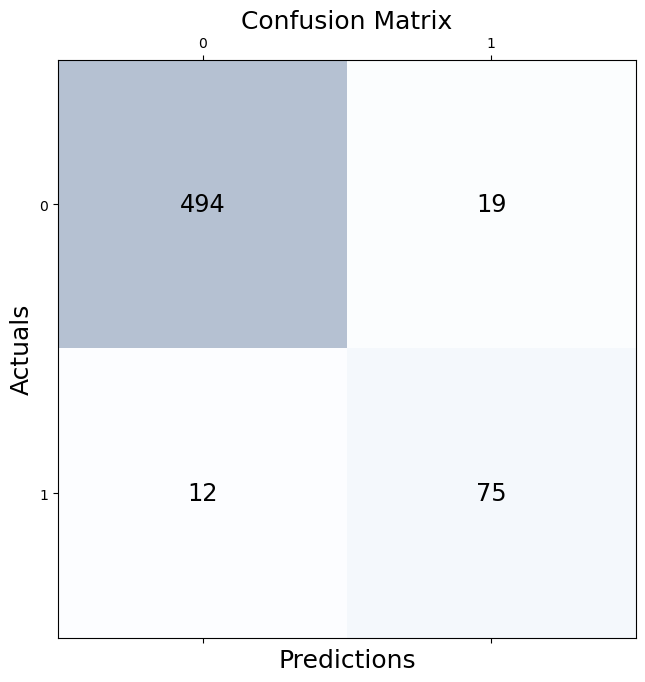

In [54]:
#Plotting the confusion Matrix
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

Report:
1. Accuracy Score: 94.83333333333334%
2. Confusion Matrix(metrics.confusion_matrix) plotted graphically(It needs to be in the final jupyter file which you submit):

    True Positive (TP): 494
    True Negative (TN): 19
    False Negative (FN): 75
    False Positive (FP): 12

   

Team Contribution:
Krishna Kumar Balasubramanian: 
Loading and preprocessing of the data.
Pooja Srinivasan:
Explaining the approach, also explain the(if any) preprocessor which you used.
Mohan Senabady:
Creation of correct model(NB), with decent metrics, plotting confusion matrix.

Code presentation with comments and reports are done together.

In [ ]:
#Reference:
#https://www.kaggle.com/code/jeffysonar/spam-filter-using-naive-bayes-classifier/notebook
#https://www.youtube.com/watch?v=shU44DT0sJA
#https://www.kdnuggets.com/2020/07/spam-filter-python-naive-bayes-scratch.html